## **Data Check Quality:**

We can begin to check the quality of the data by checking to see whether there is any gaps in the data




In [ ]:
# Install any packages the we might need
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Read the csv file given in the task
data = pd.read_csv('/content/V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

summary = data.describe(include='all')
print(summary)

# We want to check the quality of the data and check that it is what we want to use

# We know from this that there is missing values in our data so we can use code to drop any rows in our data with missing values


               Year         Age   GenderNum  AutismQuotient        STAI  \
count    548.000000  548.000000  543.000000      548.000000  548.000000   
unique          NaN         NaN         NaN             NaN         NaN   
top             NaN         NaN         NaN             NaN         NaN   
freq            NaN         NaN         NaN             NaN         NaN   
mean    2020.711679   29.677007    1.788214        3.237226   46.985401   
std        0.731187    8.828638    0.435179        1.741609   11.955576   
min     2020.000000   16.000000    1.000000        0.000000   20.000000   
25%     2020.000000   24.000000    2.000000        2.000000   39.000000   
50%     2021.000000   28.500000    2.000000        3.000000   47.000000   
75%     2021.000000   34.000000    2.000000        4.000000   55.000000   
max     2022.000000  101.000000    3.000000       10.000000   77.000000   

        BRIEF_Total  Device  DailyAvgMins  DailyAvePickups  \
count    548.000000     548    548.00

Describe the data that we are using and the variables in the data:

In [ ]:
print(data.isnull().sum())

# This code suggests that there are no missing values in our data but by looking at the csv file we knwo that this is not true

Year                         0
Age                          0
GenderNum                    5
AutismQuotient               0
STAI                         0
BRIEF_Total                  0
Device                       0
DailyAvgMins                 0
DailyAvePickups              0
VS_RT_correct_Conjunction    0
VS_RT_correct_Single         0
dtype: int64


In [ ]:
print(data.dtypes)

Year                           int64
Age                            int64
GenderNum                    float64
AutismQuotient                 int64
STAI                           int64
BRIEF_Total                    int64
Device                        object
DailyAvgMins                   int64
DailyAvePickups                int64
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object


In [ ]:
columns_to_convert = ['Age', 'GenderNum', 'AutismQuotient','STAI','BRIEF_Total','DailyAvgMins', 'DailyAvePickups','VS_RT_correct_Conjunction','VS_RT_correct_Single']

# Iterate through the specified columns and convert to integers
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce', downcast='integer')

## **Missing Data:**

What should we do with the missing data in the table: Becuase the missing values in our data represent more than 5% of our overall data it is therefore not a good idea to just drop all of the rows wiht missing data

How can missing data interfer with any analysis that we complete: Dropping all rows with missing values may skew our data if the missing values are biased in anyway. This therefore could make any analysis and inference we make from our data invalid.

What are the potential methods we can use to help solve this problem: One way in which we could fill the missing values in our data is by using KNN inputer. The KNN inputer works by inputing missing data based on the nearest neighbours of the missing data points.

In [ ]:
print(data.isnull().sum())


Year                         0
Age                          0
GenderNum                    5
AutismQuotient               0
STAI                         0
BRIEF_Total                  0
Device                       0
DailyAvgMins                 0
DailyAvePickups              0
VS_RT_correct_Conjunction    0
VS_RT_correct_Single         0
dtype: int64


### **Addressing missing data in DailyAvgmins and DailyAvePickups:**



In [ ]:
from sklearn.impute import KNNImputer

# Select the columns you want to impute
columns_to_impute = ['DailyAvePickups', 'DailyAvgMins']

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed

# Apply imputation to selected columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])
data[columns_to_impute] = data[columns_to_impute].round().astype(int)


Is there any other data that we can change?

The other variables that have missing data only have a few and therefore it may not be necessary to input data here and we can now just remove any rows with missing data.

In [ ]:
data = data.dropna()
data.drop('Device',axis=1)
data

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083


## **Data Relationship/Distribution:**

provide a frequency table and an appropriate plot to visualise the pickup counts by gender.

In [1]:
# Create a frequency table using groupby
frequency_table = data.groupby('DailyAvePickups')['GenderNum'].value_counts().unstack().fillna(0)

# Display the frequency table
print("Frequency Table:\n", frequency_table)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np

freq_table = pd.crosstab(data['GenderNum'], data['DailyAvePickups'])
freq_table


DailyAvePickups,32,34,37,40,46,48,49,50,51,53,...,164,165,176,177,178,194,204,218,228,272
GenderNum,,,,,,,,,,,,,,,,,,,,,
1.0,99,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2.0,312,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,0
3.0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
avg_table = data.groupby('GenderNum')['DailyAvePickups'].mean().reset_index()
print(avg_table)

   GenderNum  DailyAvePickups
0        1.0        44.429752
1        2.0        50.625000
2        3.0        65.000000


## **Daily Average mins distribution:**

We can visualise this distribution by the daily amount of pickups and by age.

Why would we choose to display the distribtion this way: Visualising the data in this way makes it easy to spot how the data is distributed and what values are the most frequent

<ipython-input-32-eb5fff6c4540>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(data['DailyAvgMins'], shade=True, color="r")
<ipython-input-32-eb5fff6c4540>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(data['DailyAvePickups'], shade=True, color="b")


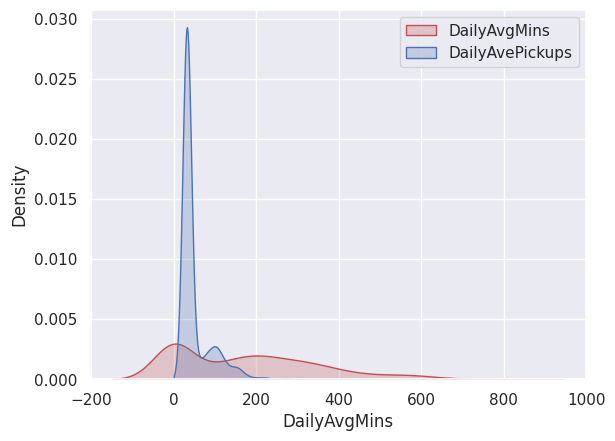

In [ ]:
sns.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sns.kdeplot(data['DailyAvgMins'], shade=True, color="r")
fig = sns.kdeplot(data['DailyAvePickups'], shade=True, color="b")
plt.legend(['DailyAvgMins', 'DailyAvePickups'])
plt.show()

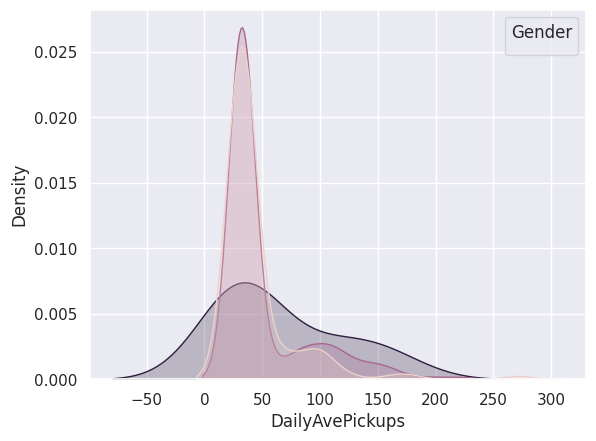

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=data, x='DailyAvePickups', hue='GenderNum', fill=True, common_norm=False)
plt.legend(title='Gender')
plt.show()

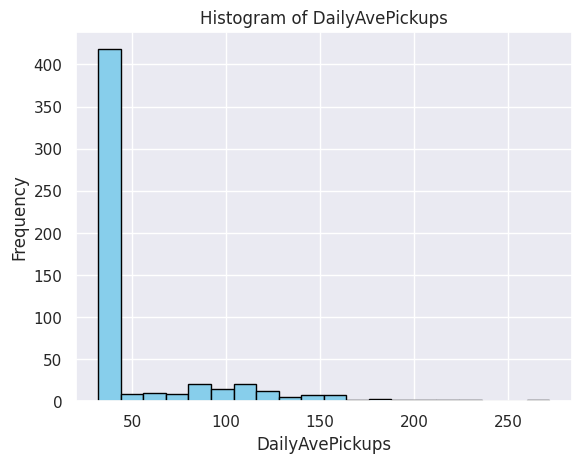

In [ ]:
# Create a histogram
plt.hist(data['DailyAvePickups'], bins=20, color='skyblue', edgecolor='black')

#format and show
plt.xlabel('DailyAvePickups')
plt.ylabel('Frequency')
plt.title('Histogram of DailyAvePickups')
plt.show()

## **Correlation Check:**

Produce a bivariate correlation table between the variables Age, STAI, BRIEF Total, Daily Avg mins, VS RT correct single

                           Age      STAI  BRIEF_Total  DailyAvgMins  \
Age                   1.000000 -0.076629    -0.034927     -0.057831   
STAI                 -0.076629  1.000000     0.632226     -0.020613   
BRIEF_Total          -0.034927  0.632226     1.000000      0.017969   
DailyAvgMins         -0.057831 -0.020613     0.017969      1.000000   
VS_RT_correct_Single  0.290584 -0.085715     0.000317     -0.125227   

                      VS_RT_correct_Single  
Age                               0.290584  
STAI                             -0.085715  
BRIEF_Total                       0.000317  
DailyAvgMins                     -0.125227  
VS_RT_correct_Single              1.000000  


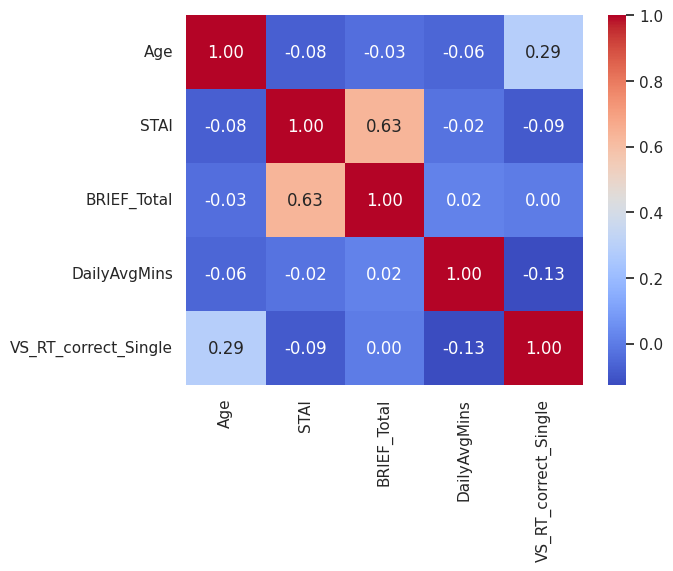

In [ ]:
selected_variables = ['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']

# Subset the DataFrame to include only the selected variables
subset_data = data[selected_variables]

# create the correlation matrix
correlation_matrix = subset_data.corr()
print(correlation_matrix)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## **Linear Regression:**

Perform a linear regression to see if daily average mins predicts VS RT correct single

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

X = data[['DailyAvgMins']]
Y = data['VS_RT_correct_Single']

# Fit the OLS model
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Get the predicted values
predicted_values = model.predict(X)

# Print the summary of the OLS regression
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.016
Model:                              OLS   Adj. R-squared:                  0.014
Method:                   Least Squares   F-statistic:                     8.619
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):            0.00347
Time:                          17:20:10   Log-Likelihood:                -3560.5
No. Observations:                   543   AIC:                             7125.
Df Residuals:                       541   BIC:                             7134.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          863.5582     

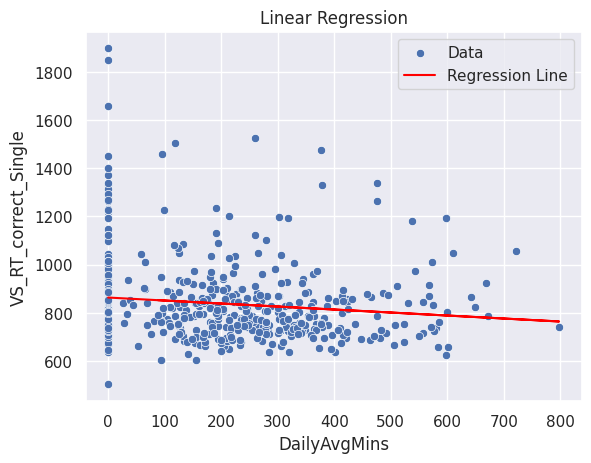

In [ ]:
# Create scatter plot
sns.scatterplot(x='DailyAvgMins', y='VS_RT_correct_Single', data=data, label='Data')

# Plot regression line
plt.plot(X['DailyAvgMins'], predicted_values, color='red', label='Regression Line')

plt.xlabel('DailyAvgMins')
plt.ylabel('VS_RT_correct_Single')
plt.title('Linear Regression')
plt.legend()
plt.show()

## **Multiple Regression:**



In [ ]:
X = data[['DailyAvgMins', 'Age', 'STAI','BRIEF_Total','GenderNum','DailyAvePickups']]
Y = data['VS_RT_correct_Single']

# Fit the OLS model
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(Y, X).fit()

# Get the predicted values
predicted_values = model.predict(X)
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.106
Model:                              OLS   Adj. R-squared:                  0.096
Method:                   Least Squares   F-statistic:                     10.64
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):           3.51e-11
Time:                          17:20:10   Log-Likelihood:                -3534.2
No. Observations:                   543   AIC:                             7082.
Df Residuals:                       536   BIC:                             7113.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             751.

## **Scenario 1:**

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[float('-inf'), 30, 50, float('inf')], labels=['a', 'b', 'c'])

# Create a new column for daily average usage groups
data['DailyAvgGroup'] = pd.cut(data['DailyAvgMins'], bins=[float('-inf'), 300, 900, float('inf')], labels=['a', 'b', 'c'])

#check that this is right
data

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single,AgeGroup,DailyAvgGroup
0,2022,16,2.0,4,49,70,iphone,0,32,1178.700000,1216.387500,a,a
1,2021,37,2.0,8,44,33,iphone,0,32,946.470000,785.597500,b,a
2,2022,16,1.0,4,20,40,iphone,0,32,1182.741667,950.900000,a,a
3,2022,16,1.0,2,21,0,iphone,0,32,1778.950000,984.333333,a,a
4,2022,16,2.0,4,21,0,iphone,0,32,521.500000,503.000000,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,32,915.785917,747.883194,b,b
544,2020,27,2.0,5,64,77,iPhone,267,32,877.783333,720.729583,a,a
545,2020,36,2.0,2,46,43,iPhone,610,32,1211.483333,1049.979167,b,b
546,2020,31,2.0,4,67,69,iPhone,558,32,899.774583,845.612083,b,b


Our hypothesis is: as participant mobile phone use increases, the time taken for them to find the search target would decrease in the singeton search, with the greatest decrease in participants less than 30 years of age.

What would be the best way to test this hypothesis: One way in which we can test this hypothesis would be to perform a two-way ANOVA. This is because we want to find out how the two factors (Age and Daily average time spent on a mobile phone) impact the reaction time in our test.

The two-way ANOVA is particularly advantageous in the respect that it allows us to unnderstand how the possible ocmbinations of both age and time spent on mobile device may influence the reaction times.

In order to carry out the two way ANOVA we must first check that our data meets the required assumptions.

The first assumption is normality. This is the assumption that our dependent varibale (residuals) are approximately normally distributed. There are some cases in which this assumption doesnt need to be satisfied, for example in large data sets the central limit theorem means that the two-way ANOVA can still provide valid results, however it is unknown what the sample size needs to be for this to work and therefore I think it is better to first check for normality.

Shapiro-Wilk Test Statistic: 0.8093851208686829, p-value: 8.2045182624671875e-25


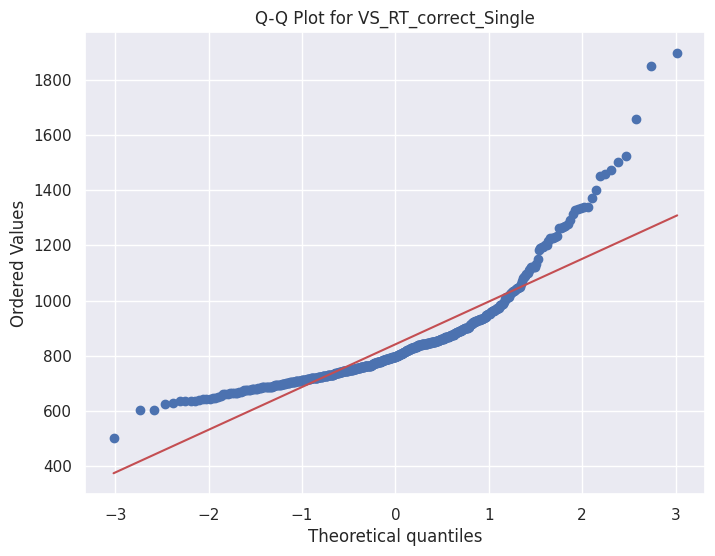

In [ ]:
# CHECK FOR NORMALITY
from scipy.stats import shapiro, probplot

# Extract the 'VS_RT_correct_Single' column
vs_rt_correct_single = data['VS_RT_correct_Single']

# Statistical Test for Normality (Shapiro-Wilk Test)
stat, p_value = shapiro(vs_rt_correct_single)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

# Plotting a Q-Q plot
plt.figure(figsize=(8, 6))
probplot(vs_rt_correct_single, plot=plt, dist='norm')
plt.title('Q-Q Plot for VS_RT_correct_Single')
plt.show()

The second assumption that we need to check is satisfied is the assumption of equal variences

In [ ]:
from scipy.stats import levene

# Assuming 'dataframe' is your DataFrame
# Replace 'dataframe' with the actual name of your DataFrame

# Group by 'AgeGroup' and 'DailyAvgGroup' and extract the 'VS_RT_correct_Single' column
grouped_data = data.groupby(['AgeGroup', 'DailyAvgGroup'])['VS_RT_correct_Single']

# Apply Levene's test to each group
stat, p_value = levene(*[group.values for _, group in grouped_data])
print(f"Levene's Test Statistic: {stat}, p-value: {p_value}")

Levene's Test Statistic: 5.275775960696094, p-value: 9.65722023597829e-05


What are the assumptions that we are making when carrying out this test? the Levene test above shows that the variances are not equal but we would still like the carry out the ANOVA



In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

data['AgeGroup'] = data['AgeGroup'].astype('category')
data['DailyAvgGroup'] = data['DailyAvgGroup'].astype('category')

# Perform two-way ANOVA
model = ols('VS_RT_correct_Single ~ AgeGroup * DailyAvgGroup', data=data).fit()
result = sm.stats.anova_lm(model, typ=2)

# Print the result
print(result)


                              sum_sq     df         F   PR(>F)
AgeGroup                         NaN    2.0       NaN      NaN
DailyAvgGroup                    NaN    2.0       NaN      NaN
AgeGroup:DailyAvgGroup  4.207368e+05    4.0  4.031931  0.01828
Residual                1.400915e+07  537.0       NaN      NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


## **Scenario 2:**



In [ ]:
# Sort the DataFrame by 'VS_RT_correct_Single' in descending order
data.sort_values(by='VS_RT_correct_Single', ascending=False, inplace=True)

# Rename columns
data.rename(columns={'VS_RT_correct_Conjunction': 'VS_RT_Before', 'VS_RT_correct_Single': 'VS_RT_After'}, inplace=True)

In [ ]:
# Create a new variable 'Brain Training' and randomly allocate participants
data['BrainTraining'] = np.random.choice([0,1], size=len(data), p=[0.5, 0.5])

data['DifferenceColumn'] = data['VS_RT_After'] - data['VS_RT_Before']
data.reset_index(drop=False, inplace=True)

# Rename the resulting column to 'ParticipantIndex'
data.rename(columns={'index': 'id'}, inplace=True)

#columns_to_convert = ['id']  # Add all the columns you want to convert
#data[columns_to_convert] = data[columns_to_convert].astype(float)


data



,id,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,AgeGroup,DailyAvgGroup,BrainTraining,DifferenceColumn
0,190,2021,16,1.0,2,24,12,iphone,0,32,1840.291667,1896.975000,a,a,1,56.683333
1,488,2020,33,1.0,3,42,49,iphone,0,32,2125.150000,1849.425000,b,a,1,-275.725000
2,494,2020,59,1.0,4,51,65,iphone,0,32,1851.734083,1659.979306,c,a,1,-191.754777
3,7,2021,31,2.0,1,43,44,iPhone,259,54,1015.666667,1524.733333,b,a,1,509.066666
4,171,2021,43,2.0,0,52,43,iPhone,119,57,1625.691667,1504.225000,b,a,0,-121.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,418,2020,27,2.0,4,30,34,Android,141,32,720.875417,628.811944,a,a,1,-92.063472
539,423,2020,18,2.0,3,47,63,iPhone,598,32,660.135833,625.043750,a,b,0,-35.092083
540,9,2021,27,1.0,3,32,4,iPhone,155,97,650.187500,604.390000,a,a,1,-45.797500
541,242,2020,30,2.0,3,54,27,iPhone,94,32,625.630917,604.172889,a,a,0,-21.458028


In [ ]:
formula = 'DifferenceColumn ~ C(GenderNum) + C(BrainTraining) + C(GenderNum):C(BrainTraining)'
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq     df         F    PR(>F)
C(GenderNum)                   4.412427e+03    2.0  0.309550  0.733908
C(BrainTraining)               4.179996e+03    1.0  0.586489  0.444117
C(GenderNum):C(BrainTraining)  5.833363e+03    2.0  0.409235  0.664365
Residual                       3.827282e+06  537.0       NaN       NaN


In [ ]:
file_path = 'phone_data.csv'
data.to_csv(file_path, index=False)